In [1]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
input_path = []
label = []
main_path = "D:\datasets\Dogs vs Cats Kaggle\PetImages\\"

for class_name in os.listdir(main_path):
    for path in os.listdir(main_path + class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(main_path, class_name, path))

In [3]:
print(input_path[0], label[0])

D:\datasets\Dogs vs Cats Kaggle\PetImages\Cat\0.jpg 0


In [4]:
df = pd.DataFrame(
    {
        "images":input_path,
        "label":label
    }
)

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df.head()

,images,label
0,D:\datasets\Dogs vs Cats Kaggle\PetImages\Dog\...,1
1,D:\datasets\Dogs vs Cats Kaggle\PetImages\Dog\...,1
2,D:\datasets\Dogs vs Cats Kaggle\PetImages\Cat\...,0
3,D:\datasets\Dogs vs Cats Kaggle\PetImages\Cat\...,0
4,D:\datasets\Dogs vs Cats Kaggle\PetImages\Dog\...,1


In [7]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

In [8]:
'''import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l'''

"import PIL\nl = []\nfor image in df['images']:\n    try:\n        img = PIL.Image.open(image)\n    except:\n        l.append(image)\nl"

In [9]:
df['label'] = df['label'].astype('str')

In [10]:
df.head()

,images,label
0,D:\datasets\Dogs vs Cats Kaggle\PetImages\Dog\...,1
1,D:\datasets\Dogs vs Cats Kaggle\PetImages\Dog\...,1
2,D:\datasets\Dogs vs Cats Kaggle\PetImages\Cat\...,0
3,D:\datasets\Dogs vs Cats Kaggle\PetImages\Cat\...,0
4,D:\datasets\Dogs vs Cats Kaggle\PetImages\Dog\...,1


In [11]:
#input split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
train.shape

(19928, 2)

In [13]:
test.shape

(4983, 2)

In [14]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_generator = ImageDataGenerator(rescale=1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 19928 validated image filenames belonging to 2 classes.
Found 4983 validated image filenames belonging to 2 classes.


In [16]:
model = Sequential([
    Conv2D(64,(3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 256)      0

In [18]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
 2/39 [>.............................] - ETA: 14:59 - loss: 4.7020 - accuracy: 0.4990

C:\Users\hashi\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


39/39 [==============================] - 1016s 26s/step - loss: 0.9294 - accuracy: 0.5609 - val_loss: 0.6710 - val_accuracy: 0.5940
Epoch 2/10
39/39 [==============================] - 1735s 45s/step - loss: 0.6267 - accuracy: 0.6482 - val_loss: 0.6402 - val_accuracy: 0.6362
Epoch 3/10
39/39 [==============================] - 977s 25s/step - loss: 0.5917 - accuracy: 0.6883 - val_loss: 0.5477 - val_accuracy: 0.7269
Epoch 4/10
39/39 [==============================] - 983s 25s/step - loss: 0.5516 - accuracy: 0.7197 - val_loss: 0.5248 - val_accuracy: 0.7375
Epoch 5/10
39/39 [==============================] - 973s 25s/step - loss: 0.5381 - accuracy: 0.7243 - val_loss: 0.4993 - val_accuracy: 0.7630
Epoch 6/10
39/39 [==============================] - 976s 25s/step - loss: 0.5008 - accuracy: 0.7556 - val_loss: 0.4878 - val_accuracy: 0.7672
Epoch 7/10
39/39 [==============================] - 977s 25s/step - loss: 0.4932 - accuracy: 0.7591 - val_loss: 0.4662 - val_accuracy: 0.7849
Epoch 8/10
39/3

In [19]:
test_img = cv2.imread("***.jpg")

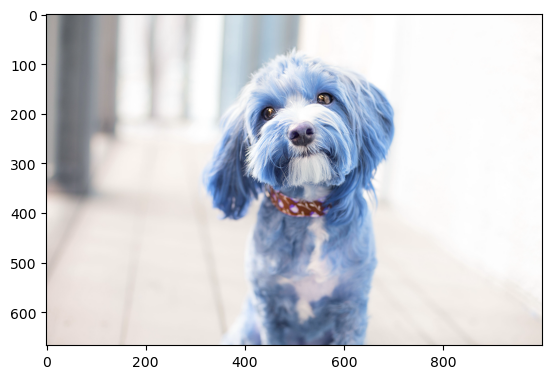

In [20]:
plt.imshow(test_img)

In [21]:
test_img.shape

(667, 1000, 3)

In [22]:
test_img = cv2.resize(test_img,(128,128))

In [23]:
test_input = test_img.reshape(1,128,128,3)

In [24]:
model.predict(test_input)

1/1 [==============================] - 0s 386ms/step


array([[0.1600271]], dtype=float32)

In [25]:
model.save("CatsvsDogsPetImages.h5")

In [26]:
model.save_weights("CatsvsDogsPetImagesweights.h5")

In [34]:
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

def predict_img(img_loc):
    img = cv2.cvtColor(cv2.imread(img_loc), cv2.COLOR_BGR2RGB)#cv2.imread(img_loc)
    img = cv2.resize(img,(128,128))
    test_input = img.reshape(1,128,128,3)
    model = keras.models.load_model("CatsvsDogsPetImages.h5")
    prediction = model.predict(test_input)
    plt.imshow(img)
    if prediction == 0:
        print(f"Model Predicted: {'Cat'}")
    else:
        print(f"Model Predicted: {'Dog'}")

1/1 [==============================] - 0s 115ms/step
Model Predicted: Cat


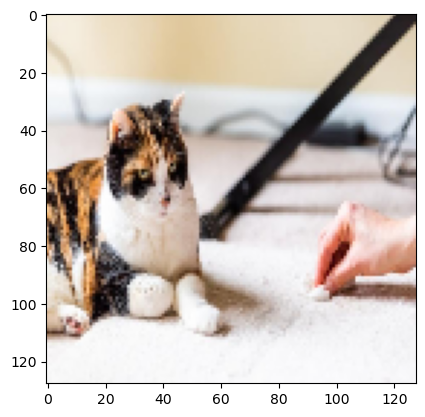

In [40]:
predict_img("***.jpg")

In [32]:
model.save("CatsvsDogsPetImages.h5")

In [33]:
model.save_weights("CatsvsDogsImagesWeights.h5")

In [42]:
import cv2
import numpy as np
from tensorflow import keras

# Load the trained model
model = keras.models.load_model("CatsvsDogsPetImages.h5")

# Open a connection to the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture a frame from the webcam
    ret, frame = cap.read()

    # Convert the frame to grayscale and resize it to the size the model expects
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (128, 128))
    frame = frame.reshape(1,128,128,3)

    # Add an extra dimension to the frame to make it 4D
    frame = np.expand_dims(frame, axis=0)
    frame = np.expand_dims(frame, axis=-1)

    # Pass the frame through the model to get a prediction
    prediction = model.predict(frame)

    # Convert the prediction to a binary label (0 or 1)
    label = 1 if prediction > 0.5 else 0

    # Display the frame with the prediction overlaid on it
    cv2.putText(frame, str(label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.imshow("Webcam", frame)

    # Exit the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()


ValueError: in user code:

    File "C:\Users\hashi\anaconda3\lib\site-packages\keras\engine\training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\hashi\anaconda3\lib\site-packages\keras\engine\training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\hashi\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\hashi\anaconda3\lib\site-packages\keras\engine\training.py", line 2079, in predict_step
        return self(x, training=False)
    File "C:\Users\hashi\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\hashi\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 1, 128, 128, 3, 1)
